<a href="https://colab.research.google.com/github/Tejas325-creator/Chemathon-2025/blob/main/NEST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df = pd.read_excel('/content/Paracetamol_Forced_Degradation_ML_Dataset.xlsx')

In [4]:
df.head()

,API,Stress_Type,pH,Temperature_C,Time_hours,%API_Loss,%Total_Degradants,Detected_Fraction,Analytical_Method,SMB,AMB,RMB,RMBD,Phi_Stress,SA_IMB
0,Paracetamol,Photolysis,NaN,64.963441,20.010309,20.129151,14.501333,0.863761,UPLC-UV,94.372182,92.396530,0.622266,0.377734,1.25,87.674851
1,Paracetamol,Thermal,NaN,53.035835,15.522553,11.534592,8.651622,0.652003,UPLC-UV,97.117030,94.106290,0.489040,0.510960,1.15,88.230256
2,Paracetamol,Oxidation,NaN,47.197421,21.612623,12.634571,10.319667,0.726126,UPLC-UV,97.685095,94.858809,0.593085,0.406915,1.30,89.568920
3,Paracetamol,Thermal,NaN,47.240608,61.136918,20.654081,13.921212,0.602499,HPLC-UV,93.267131,87.733440,0.406095,0.593905,1.15,80.903533
4,Paracetamol,Thermal,NaN,37.446736,27.700915,18.651721,12.066427,0.909900,HPLC-UV,93.414706,92.327517,0.588645,0.411355,1.15,87.596931


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   API                12000 non-null  object 
 1   Stress_Type        12000 non-null  object 
 2   pH                 4072 non-null   float64
 3   Temperature_C      12000 non-null  float64
 4   Time_hours         12000 non-null  float64
 5   %API_Loss          12000 non-null  float64
 6   %Total_Degradants  12000 non-null  float64
 7   Detected_Fraction  12000 non-null  float64
 8   Analytical_Method  12000 non-null  object 
 9   SMB                12000 non-null  float64
 10  AMB                12000 non-null  float64
 11  RMB                12000 non-null  float64
 12  RMBD               12000 non-null  float64
 13  Phi_Stress         12000 non-null  float64
 14  SA_IMB             12000 non-null  float64
dtypes: float64(12), object(3)
memory usage: 1.4+ MB


In [6]:
rows, cols = df.shape

In [7]:
df.shape

(12000, 15)

In [8]:
# Count NaN per column
missing = df.isna().sum()
# Output: Series with col names and NaN count
# Age: 5, Income: 0, ...
# Check duplicates
dups = df.duplicated().sum()

In [9]:
dups

np.int64(0)

In [10]:
missing

,0
API,0
Stress_Type,0
pH,7928
Temperature_C,0
Time_hours,0
%API_Loss,0
%Total_Degradants,0
Detected_Fraction,0
Analytical_Method,0
SMB,0


In [17]:
df

,API,Stress_Type,pH,Temperature_C,Time_hours,%API_Loss,%Total_Degradants,Detected_Fraction,Analytical_Method,SMB,AMB,RMB,RMBD,Phi_Stress,SA_IMB
0,Paracetamol,Photolysis,2.981341,64.963441,20.010309,20.129151,14.501333,0.863761,UPLC-UV,94.372182,92.396530,0.622266,0.377734,1.25,87.674851
1,Paracetamol,Thermal,2.981341,53.035835,15.522553,11.534592,8.651622,0.652003,UPLC-UV,97.117030,94.106290,0.489040,0.510960,1.15,88.230256
2,Paracetamol,Oxidation,2.981341,47.197421,21.612623,12.634571,10.319667,0.726126,UPLC-UV,97.685095,94.858809,0.593085,0.406915,1.30,89.568920
3,Paracetamol,Thermal,2.981341,47.240608,61.136918,20.654081,13.921212,0.602499,HPLC-UV,93.267131,87.733440,0.406095,0.593905,1.15,80.903533
4,Paracetamol,Thermal,2.981341,37.446736,27.700915,18.651721,12.066427,0.909900,HPLC-UV,93.414706,92.327517,0.588645,0.411355,1.15,87.596931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,Paracetamol,Base Hydrolysis,12.596581,69.114716,23.105186,8.783279,7.732239,0.628367,UPLC-UV,98.948960,96.075406,0.553174,0.446826,1.00,91.607149
11996,Paracetamol,Thermal,2.981341,48.586009,35.712871,14.616932,11.328245,0.732068,UPLC-UV,96.711313,93.676110,0.567359,0.432641,1.15,88.700734
11997,Paracetamol,Humidity,2.981341,62.213630,38.598494,17.744101,11.851395,0.848113,HPLC-UV,94.107294,92.307217,0.566460,0.433540,1.00,87.971814
11998,Paracetamol,Thermal,2.981341,69.981720,61.005622,23.839149,18.272783,0.861246,HPLC-UV,94.433634,91.898213,0.660148,0.339852,1.15,87.989913


In [11]:
# Mean pH (ignoring NaNs)
mean_pH = df['pH'].mean()

# Median pH
median_pH = df['pH'].median()

# Mode pH
mode_pH = df['pH'].mode()[0]

mean_pH, median_pH, mode_pH


(np.float64(6.337564125135783),
 2.9813409253822734,
 np.float64(0.500462988238607))

In [20]:
# Acid hydrolysis median
acid_median = df.loc[df['Stress_Type'] == 'Acid Hydrolysis', 'pH'].median()

# Base hydrolysis median
base_median = df.loc[df['Stress_Type'] == 'Base Hydrolysis', 'pH'].median()

# Fill NaNs conditionally
df.loc[(df['Stress_Type'] == 'Acid Hydrolysis') & (df['pH'].isna()), 'pH'] = acid_median
df.loc[(df['Stress_Type'] == 'Base Hydrolysis') & (df['pH'].isna()), 'pH'] = base_median


In [21]:
df

,API,Stress_Type,pH,Temperature_C,Time_hours,%API_Loss,%Total_Degradants,Detected_Fraction,Analytical_Method,SMB,AMB,RMB,RMBD,Phi_Stress,SA_IMB
0,Paracetamol,Photolysis,NaN,64.963441,20.010309,20.129151,14.501333,0.863761,UPLC-UV,94.372182,92.396530,0.622266,0.377734,1.25,87.674851
1,Paracetamol,Thermal,NaN,53.035835,15.522553,11.534592,8.651622,0.652003,UPLC-UV,97.117030,94.106290,0.489040,0.510960,1.15,88.230256
2,Paracetamol,Oxidation,NaN,47.197421,21.612623,12.634571,10.319667,0.726126,UPLC-UV,97.685095,94.858809,0.593085,0.406915,1.30,89.568920
3,Paracetamol,Thermal,NaN,47.240608,61.136918,20.654081,13.921212,0.602499,HPLC-UV,93.267131,87.733440,0.406095,0.593905,1.15,80.903533
4,Paracetamol,Thermal,NaN,37.446736,27.700915,18.651721,12.066427,0.909900,HPLC-UV,93.414706,92.327517,0.588645,0.411355,1.15,87.596931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,Paracetamol,Base Hydrolysis,12.596581,69.114716,23.105186,8.783279,7.732239,0.628367,UPLC-UV,98.948960,96.075406,0.553174,0.446826,1.00,91.607149
11996,Paracetamol,Thermal,NaN,48.586009,35.712871,14.616932,11.328245,0.732068,UPLC-UV,96.711313,93.676110,0.567359,0.432641,1.15,88.700734
11997,Paracetamol,Humidity,NaN,62.213630,38.598494,17.744101,11.851395,0.848113,HPLC-UV,94.107294,92.307217,0.566460,0.433540,1.00,87.971814
11998,Paracetamol,Thermal,NaN,69.981720,61.005622,23.839149,18.272783,0.861246,HPLC-UV,94.433634,91.898213,0.660148,0.339852,1.15,87.989913


In [15]:
# Count NaN per column
missing = df.isna().sum()
# Output: Series with col names and NaN count
# Age: 5, Income: 0, ...
# Check duplicates
dups = df.duplicated().sum()

In [23]:
dups

np.int64(0)

In [16]:
# Mean, Std, Min, Max, Quartiles
stats = df.describe()

In [17]:
stats

,pH,Temperature_C,Time_hours,%API_Loss,%Total_Degradants,Detected_Fraction,SMB,AMB,RMB,RMBD,Phi_Stress,SA_IMB
count,4072.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,6.337564,52.433637,36.334099,13.880961,10.785183,0.790000,96.904222,94.645474,0.613750,0.386250,1.115342,90.339946
std,4.719274,15.821492,20.620917,6.356103,5.177474,0.110539,2.103581,3.037833,0.118049,0.118049,0.124220,4.047419
min,0.500463,25.000511,0.501467,2.000000,1.202667,0.600044,86.451211,79.062362,0.362958,0.073756,1.000000,71.698699
25%,1.749773,38.696944,18.729177,9.318922,7.105874,0.694268,95.656874,92.822791,0.525446,0.303978,1.000000,87.782584
50%,2.981341,52.289689,36.535951,13.776368,10.527710,0.788633,97.357494,95.048898,0.603472,0.396528,1.000000,90.751315
75%,10.963152,65.979942,54.175964,18.149699,14.134151,0.887675,98.568393,96.909872,0.696022,0.474554,1.250000,93.314967
max,12.998543,79.994097,71.998132,35.000000,32.233483,0.979959,99.893080,99.781548,0.926244,0.637042,1.300000,98.817611


In [18]:
# Select only numeric columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols

Index(['pH', 'Temperature_C', 'Time_hours', '%API_Loss', '%Total_Degradants',
       'Detected_Fraction', 'SMB', 'AMB', 'RMB', 'RMBD', 'Phi_Stress',
       'SA_IMB'],
      dtype='object')

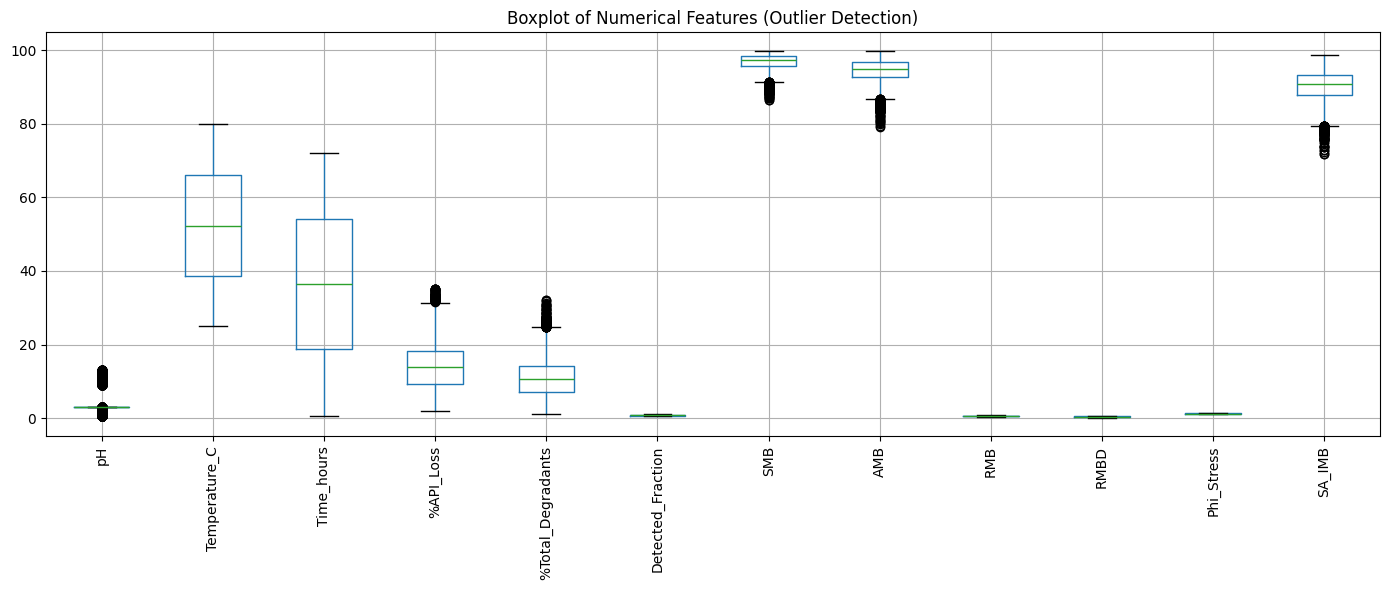

In [31]:
plt.figure(figsize=(14, 6))
df[num_cols].boxplot(rot=90)
plt.title("Boxplot of Numerical Features (Outlier Detection)")
plt.tight_layout()
plt.show()


In [19]:
outlier_summary = {}

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    outlier_summary[col] = {
        "Lower Bound": lower_bound,
        "Upper Bound": upper_bound,
        "Outlier Count": outliers.shape[0]
    }

outlier_df = pd.DataFrame(outlier_summary).T
outlier_df


,Lower Bound,Upper Bound,Outlier Count
pH,-12.070295,24.783221,0.0
Temperature_C,-2.227553,106.904438,0.0
Time_hours,-34.441004,107.346144,0.0
%API_Loss,-3.927243,31.395864,59.0
%Total_Degradants,-3.436542,24.676567,98.0
Detected_Fraction,0.404159,1.177784,0.0
SMB,91.289596,102.935671,200.0
AMB,86.692168,103.040494,175.0
RMB,0.269581,0.951886,0.0
RMBD,0.048114,0.730419,0.0


In [23]:
mb_methods = ["SMB", "AMB", "RMB", "RMBD", "SA_IMB"]

variance_results = {}

for mb in mb_methods:
    variance_results[mb] = (
        df.groupby("Stress_Type")[mb]
        .var()
        .mean()
    )

variance_df = pd.DataFrame.from_dict(
    variance_results, orient="index", columns=["Avg_Variance_Across_Stress"]
)

variance_df.sort_values(by="Avg_Variance_Across_Stress")

,Avg_Variance_Across_Stress
RMBD,0.013934
RMB,0.013934
SMB,4.127992
AMB,8.363451
SA_IMB,14.571364


In [24]:
cv_results = {}

for mb in mb_methods:
    cv_results[mb] = (
        df.groupby("Stress_Type")[mb]
        .std()
        .div(df.groupby("Stress_Type")[mb].mean())
        .mean()
    )

cv_df = pd.DataFrame.from_dict(
    cv_results, orient="index", columns=["Avg_CV_Across_Stress"]
)

cv_df.sort_values(by="Avg_CV_Across_Stress")


,Avg_CV_Across_Stress
SMB,0.020847
AMB,0.030490
SA_IMB,0.042098
RMB,0.192301
RMBD,0.305635


In [26]:
from scipy.stats import pearsonr

mb_methods = ["SMB", "AMB", "RMB", "RMBD", "SA_IMB"]

sensitivity_results = {}

for mb in mb_methods:
    corr, p_value = pearsonr(df["Detected_Fraction"], df[mb])
    sensitivity_results[mb] = {
        "Abs_Correlation": abs(corr),
        "P_value": p_value
    }

sensitivity_df = pd.DataFrame(sensitivity_results).T
sensitivity_df.sort_values(by="Abs_Correlation")

,Abs_Correlation,P_value
SMB,0.003574,0.695422
AMB,0.386601,0.000000
SA_IMB,0.525886,0.000000
RMB,0.730196,0.000000
RMBD,0.730196,0.000000


In [27]:
import statsmodels.api as sm

X = sm.add_constant(df["Detected_Fraction"])

for mb in ["AMB", "SA_IMB"]:
    model = sm.OLS(df[mb], X).fit()
    print(mb, model.params[1])


AMB 10.624612970164602
SA_IMB 19.25556979282705


/tmp/ipython-input-2125512039.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(mb, model.params[1])


Based on ICH Q1A(R2) and industry practice:

Lower bound: 85% (below this → unacceptable mass loss)

Upper bound: 105% (above this → analytical artifact / overestimation)

In [29]:
LOWER_LIMIT = 85
UPPER_LIMIT = 105


In [30]:
failure_results = {}

total_rows = len(df)

for mb in mb_methods:
    failures = df[(df[mb] < LOWER_LIMIT) | (df[mb] > UPPER_LIMIT)].shape[0]
    failure_results[mb] = failures / total_rows

failure_df = pd.DataFrame.from_dict(
    failure_results, orient="index", columns=["Failure_Rate"]
)

failure_df.sort_values(by="Failure_Rate")


,Failure_Rate
SMB,0.000000
AMB,0.004250
SA_IMB,0.103333
RMB,1.000000
RMBD,1.000000


In [31]:
stress_failure = {}

for stress in df["Stress_Type"].unique():
    stress_failure[stress] = {}
    sub = df[df["Stress_Type"] == stress]

    for mb in mb_methods:
        failures = sub[(sub[mb] < LOWER_LIMIT) | (sub[mb] > UPPER_LIMIT)].shape[0]
        stress_failure[stress][mb] = failures / len(sub)

stress_failure_df = pd.DataFrame(stress_failure).T
stress_failure_df


,SMB,AMB,RMB,RMBD,SA_IMB
Photolysis,0.0,0.011117,1.0,1.0,0.189995
Thermal,0.0,0.002954,1.0,1.0,0.068932
Oxidation,0.0,0.009749,1.0,1.0,0.234992
Base Hydrolysis,0.0,0.000000,1.0,1.0,0.043048
Humidity,0.0,0.001016,1.0,1.0,0.041138
Acid Hydrolysis,0.0,0.000975,1.0,1.0,0.047782


from matplotlib import pyplot as plt
stress_failure_df['AMB'].plot(kind='hist', bins=20, title='AMB')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
stress_failure_df['SA_IMB'].plot(kind='hist', bins=20, title='SA_IMB')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
stress_failure_df.plot(kind='scatter', x='AMB', y='SA_IMB', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['SMB']
  ys = series['AMB']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = stress_failure_df.sort_values('SMB', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('SMB')
_ = plt.ylabel('AMB')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['SMB']
  ys = series['SA_IMB']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = stress_failure_df.sort_values('SMB', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('SMB')
_ = plt.ylabel('SA_IMB')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['SMB']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'SMB'}, axis=1)
              .sort_values('SMB', ascending=True))
  xs = counted['SMB']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = stress_failure_df.sort_values('SMB', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('SMB')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['RMB']
  ys = series['AMB']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = stress_failure_df.sort_values('RMB', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('RMB')
_ = plt.ylabel('AMB')

from matplotlib import pyplot as plt
stress_failure_df['AMB'].plot(kind='line', figsize=(8, 4), title='AMB')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
stress_failure_df['SA_IMB'].plot(kind='line', figsize=(8, 4), title='SA_IMB')
plt.gca().spines[['top', 'right']].set_visible(False)

In [32]:
sa_imb_percentiles = df["SA_IMB"].quantile([0.05, 0.10, 0.90, 0.95])
sa_imb_percentiles


,SA_IMB
0.05,82.997899
0.10,84.889984
0.90,95.285063
0.95,96.279374
